# 1.0 APRESENTAÇÃO DO CASE

## 1.1 Problemática
O case atual nos pede para descrevermos  o perfil dos clientes que saíram do banco, quais foram os principais fatores ou variáveis que mais evidenciaram a sua saída.**negrito**

O objetivo principal é além de mapear essas pessoas para que o time de negócios consiga observar tais padrões  e evite que esses clientes deixem a intituição financeira.

## 1.2 Biblíotecas utilizadas
- Utilizei o Pandas para análise tratamento e manipulação de dados
- O Matplotlib e Seaborn para plotagem de gráficos em série
- Warnings para retirada de umas mensagens de erro que possa poluir o relatório


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2.0 Iniciando a Análise Exploratória 
- Para entender melhor o dataset busquei comandos do pandas que me dessem informações iniciais sobre o conjunto de dados.  

- Foi possível  observar :  tamanho do dataset, quantidade de linhas e colunas, tipo de variáveis, valores, máximos mínimos e médios das variáveis quantitativas e qualitativas e seus desvios e se há correlação entre as variáveis.


In [ ]:
df = pd.read_csv ('churn.csv')
display(df)

In [ ]:
display(df)

In [ ]:
df.drop(columns = ['Surname','CustomerId'], axis = 1, inplace = True)
df.head(1)

In [ ]:
df.info()

In [1]:
df.nunique(axis=0) 

NameError: ignored

In [ ]:
df.describe().round(0)

In [ ]:
correlacao = df.corr().round(0)

In [ ]:
plt.figure(figsize = (13, 12))  
sns.heatmap(correlacao, linewidths = 2, cbar= True, annot = True, fmt = '.2f')
plt.show()

Obtendo as primeiras percepções.

- Foi necessário excluir as colunas 'Surname','CustomerId', pois as mesmas não traz nenhuma informação relevante para análise exploratória.

- O dataset possui: 4 variáveis quantitativas e 6 qualitativas e uma variável de saída exited = 0 (permenceu) e exited = 1 (saiu)

- Foi observado que há uma variação considerável nos dados quantitativos

- O valor máximo 'CreditScore' varia de 350 - 850 e seu valor médio é de 651

- A idade possui uma grande amplitude variando entre 18 - 92

- O 'Balance' e 'EstimatedSalary', ambos possuiram o desvio padrão muito elevado 62.k e 575k respectivamente quando comparado com a média.

- Foi observada uma correlação positiva entre a variável resposta e idade (Exited e Age)seu valor foi de 0.29

- Também foi observado uma correlação negativa entre Exited e IsActiveMember sendo de valor -0.16 .

- Não foi encontrado nenhuma variável com multicolinearidade (para caso um dia seja necessária uma análise pred

## 3.0 OBSERVANDO AS VARIÁVEIS QUALITATIVAS
- Realizei vários comandos de value_counts() e  análises e gráficas 7 value counts  para obter insghts sobre o conjunto de dados



In [ ]:
#Plotando os gráficos

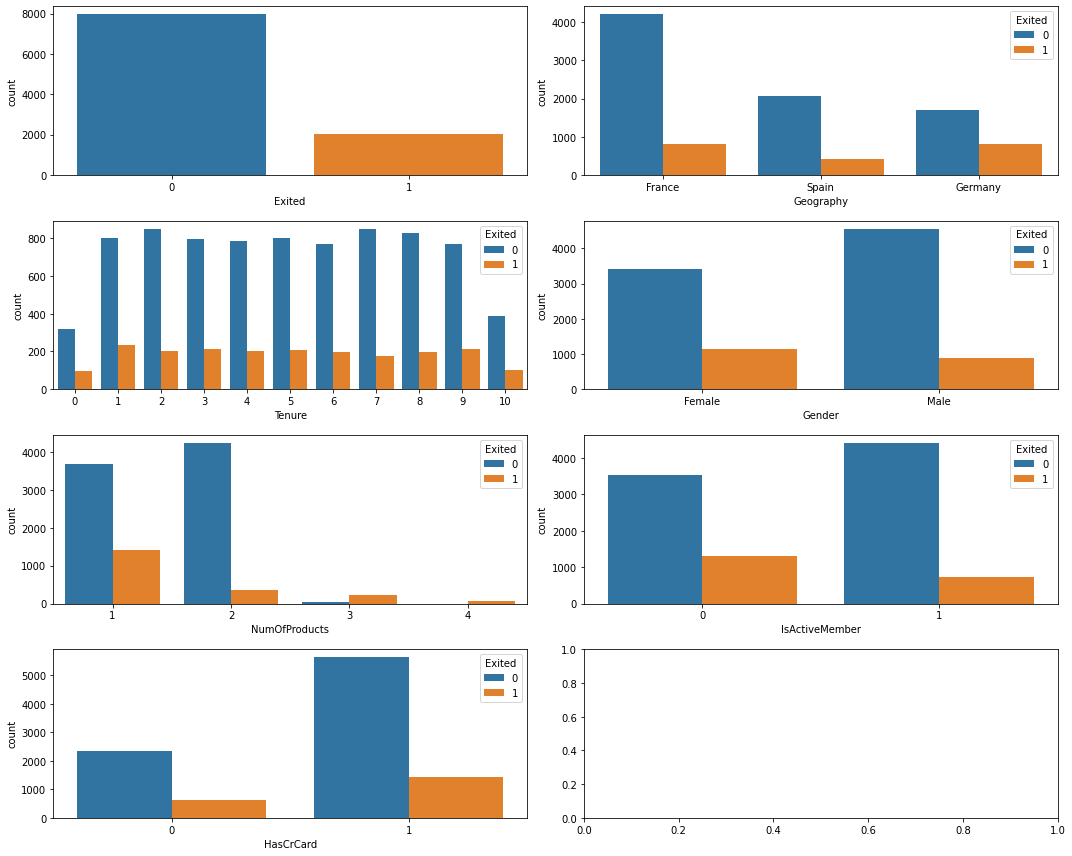

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 12))

sns.countplot('Exited', data = df, ax = ax [0][0])
sns.countplot('Geography', hue = 'Exited', data = df, ax = ax [0][1])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax [1][0])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot('NumOfProducts', hue = 'Exited' , data = df, ax = ax [2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax [2][1])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax [3][0])


plt.tight_layout()
plt.show()


1- Primeiro Gráfico Exited:
- Com o total de 10000 clientes, permaneceram 7963(79,63%) e 2037(20,37%) saíram;

2 - Segundo Gráfico: Geography
-  No primeiro gráfico é possível observar que a França é o maior detentor de clientes seguidos Espanha e Alemanha;
- O cenário muda quando é observado os números dos clientes que deixaram o banco, a Alemanha se torna o país com maior número de dissidentes com 814  seguido da França 810  e Espanha com 413;

3- Terceiro gráfico: Tenure
- Não foi possível obter nenhum padrão observando isoladamente este gráfico, aparentemente o padrão  de distribuição é o mesmo, com exceção do valor inicial.

4 - Quarto Gráfico : Gender
- No total foi possível observar que no dataset há 5457 homens e 4543 mulheres havendo uma diferença de 914 de  homens a mais.
- Ao observar foi possível perceber que há mais mulheres deram churn 1139 quando comparada com homens 898 ,

5 - Quinto gráfico: NumOfProducts
- A maioria dos clientes possuem apenas um produto (5084) seguido de 2 produtos (4590) e 3 (266 )e 4 produtos (60)
- A quantidade de clientes decai de acordo com que aumenta o número de produtos.  
-  Há uma discrepância muito grande entre os clientes que possui 1 e 2 produtos para aqueles que possuem 3 e 4.
- Quando observado apenas aqueles que saíram a discrepância dos dados é percebida apenas entre aqueles que obtiveram apenas um produto. Um produto (1409) , dois produtos (348), três produtos (220) e quatro(60). Note que todos que tinham 4 produtos deixaram de ser clientes.

6- Sexto Gráfico : IsActiveMember
- Os membros inativos possuem uma tendencia maior de saída . No total de 2037 membros que saíram, 1302 eram  membros inativos já  entre os clientes ativos foram 735.


7 - Sétimo Gráfico: Hascard
- A maioria dos clientes que saíram possui cartão de crédito, no total de 2037 clientes ausentes 1424 tinham cartão de crédito.


# 4.0 Iniciando a observação das variáveis númericas 
- A título de uma análise explorátória mais suscinta decidi realizar alguns value counts e um gráfico de boxplot para observar como as variáveis de saída e entrada se

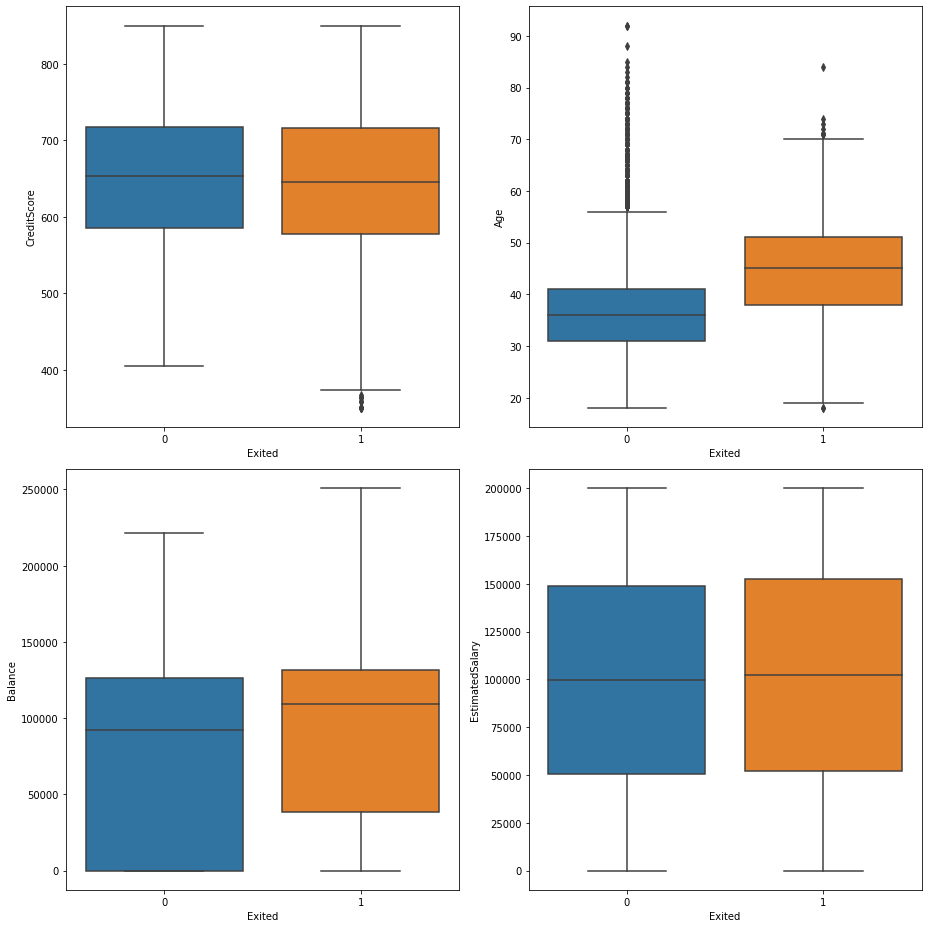

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (13, 13))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()



1- Boxplot : CreditScore

- Não foi observado diferenças entre os valores entrada dos clientes que permaneceram e saíram do banco.

2- Boxplot Age
- Aparentemente há uma diferença entre os que permanecem e saíram do banco;

- Os que saem do banco são mais velhos quando comparados com os que permanecem;

- Tenho que observar onde está estão essas diferenças;

- Porém vale salientar que os valores de idade de quem fica possui muitos dados discrepantes
podendo influenciar nos valores dos boxplots;

4- Boxplot -  Balance
- É possível observar que o banco tem perdido clientes com saldo bancário até significativo; 
- A maioria dos clientes que permanecem também possui 0 no saldo bancário
5 - Boxplot - EstimateSalary
- Não há diferença de quem sai e de quem 


In [ ]:
## 5.0 Aprofundando ainda mais a análise exploratória

# 5.0 Aprofundando ainda mais a análise exploratória

In [ ]:
# IDADE

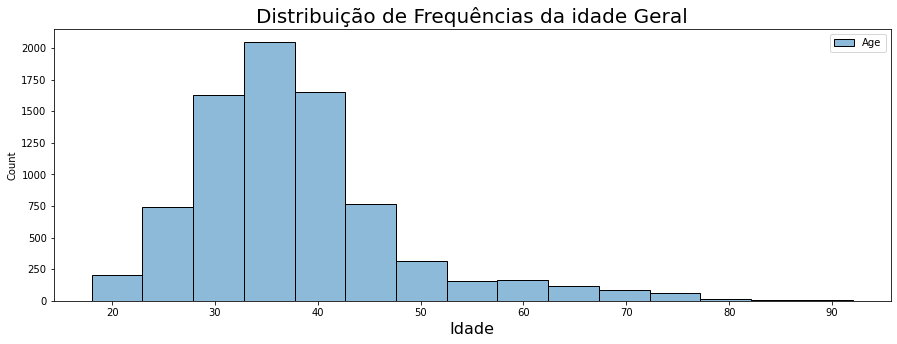

In [ ]:
hist_age = sns.histplot(age4, kde= False, bins = 15    )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências da idade Geral', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age
plt.show()


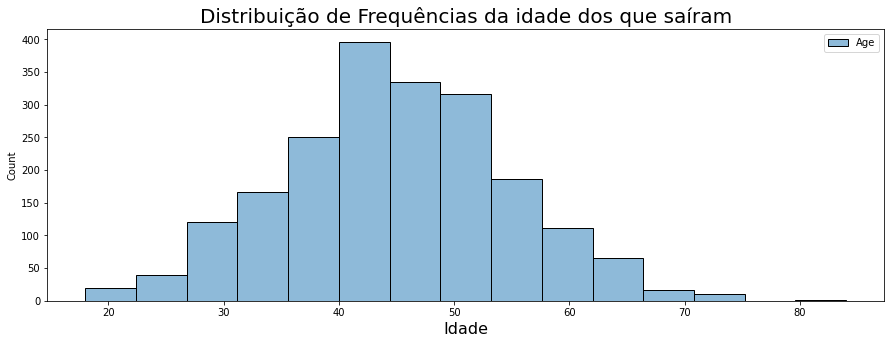

In [ ]:
hist_age = sns.histplot(age2, kde= False, bins = 15)
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências da idade dos que saíram', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age 
plt.show()


AGE (IDADE)
- Trata-se de uma variável quantitativa que seu valor mínimo no conjunto de dados gerais é de 18 anos e valor máximo de 92.

- Como estamos observando a fundo os valores de quem saiu (churn=1) no nosso histograma de frequêcia é possível constatar que as pessoas na faixa com idade entre 35 - 55 anos são aquelas que mais deram churn.

-  Isto em valores   o totais são: 1690 de clientes que corresponde a  de 83% das pessoas que saíram do banco.

In [ ]:
#SCORE

In [ ]:
def faixa_score (score):
	if score <= 600: return '475 - 600'
	if score <= 850: return '600 - 850'
df['Score_quali'] = [faixa_score(score) for score in df.CreditScore.to_list()]
df

Para um melhor entendimento dos dados resolvi estruturar algumas variáveis quantitativas em faixas ou intervalos

- O 'CreditScore' foi subdividido em 4 partes, iniciando  com valores menores < 475(que é onde fica os menor quantiade de clientes)até 850 , valor máximo.


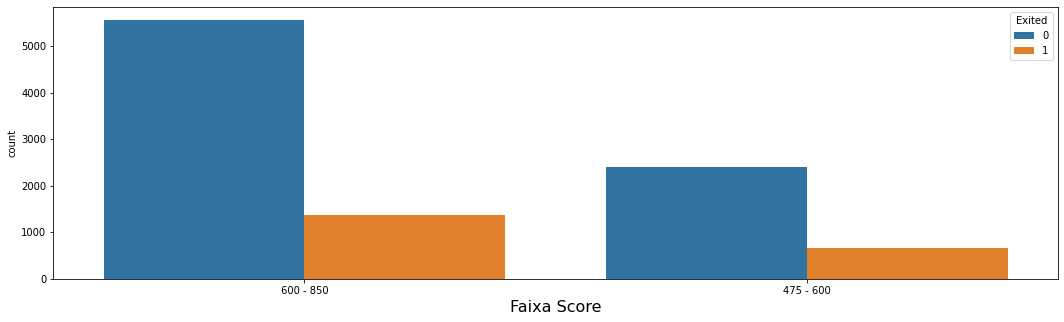

In [ ]:
score_grafico = sns.countplot('Score_quali', data = df, hue = 'Exited')
score_grafico.figure.set_size_inches(18, 5)
score_grafico.set_xlabel('Faixa Score', fontsize=16)
plt.show()

- O 'CreditScore'também é uma variável quantitativa onde avalia cada cliente com um sistema de metragem estipulado pelo prórprio banco onde seus valores mínimos são 350 e máximos 850.
- Sabendo os valores mínimos e máximos subdividivos os dados em duas  partes iguais de 250.
- Utilizando a ferramenta gráfica e o value counts observamos que os valores de scores 600 - 850 detém 1372 isso corresponde a 67 % das pessoas que deram chrun deixaram de membros do banco.

In [ ]:
# Salário

In [ ]:
# Dividi o salário em 4 partes iguais 
def faixa_salario (salario):

    if salario <= 50000: return '< 50k'
    if 100000 >= salario >= 50000: return '50k - 100k'
    if 150000 >= salario >= 100000: return '100k - 150k'
    if 200000 >= salario >= 150000: return '150k - 200k'
df['Salary_quali'] = [faixa_salario(salario) for salario in df.EstimatedSalary.to_list()]
df


- Com 'EstimatedSalary' Também subdividi em 4 partes porém todas elas iguais de iniciando com valores menores 50 e finalizando  menores do que 200.

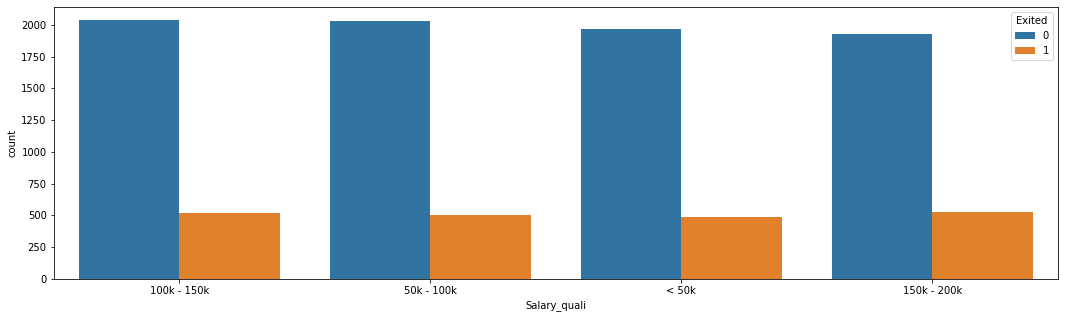

In [ ]:
salario_grafico = sns.countplot('Salary_quali', data = df, hue = 'Exited')
salario_grafico.figure.set_size_inches(18, 5)
score_grafico.set_xlabel('Faixa Score', fontsize=16)
plt.show()


EstimatedSalary : Salário estimado
- Há uma grande variação nesta variável de seus valores máximos e mínimos;
- Seu valor mínimo é de 12 e o seu valor máximo é de 199k;
- Ela é mensurada anualmente;
- Média de 75k e desvio padrão 575k (ilustrando a grande variabilidade dos dados)
- Subdividi os dados em 4 partes iguais:
0 - 50;
50 - 100;
100 - 150; 
150 - 200 até a a chegada do seu valor máximo.

Resultados:
- Conforme ilustrado no gráfico acima não foi percebido nenhum padrão de saída de clientes na faixa salário isolamente
- As pessoas costumam dar churn independentemente da faixa salarial

In [ ]:
# Balance

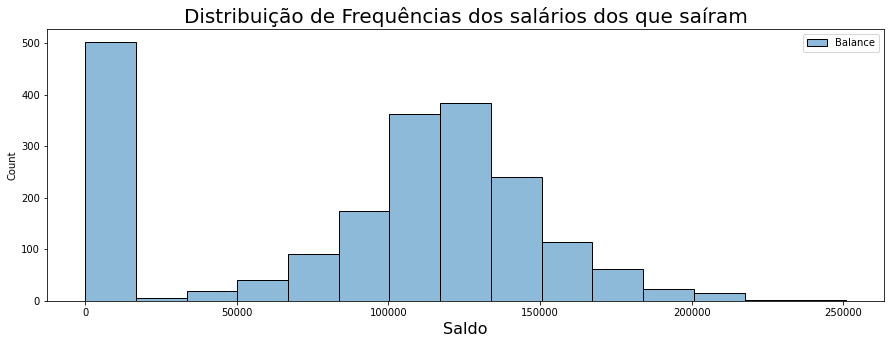

In [ ]:
hist_age = sns.histplot(balance2, kde= False, bins = 15)
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências dos salários dos que saíram', fontsize=20)
hist_age.set_xlabel('Saldo', fontsize=16)
hist_age 
plt.show()

In [ ]:
def saldo_em_conta (saldo):
    if saldo <= 0: return '0'
    if saldo <= 50000: return '< 50k'
    if 100000 >= saldo >= 50000: return '50k - 100k'
    if 150000 >= saldo >= 100000: return '100k - 150k'
    if 200000 >= saldo >= 150000: return '150k - 200k'
df['balance_quali'] = [saldo_em_conta(saldo) for saldo in df.Balance.to_list()]
df


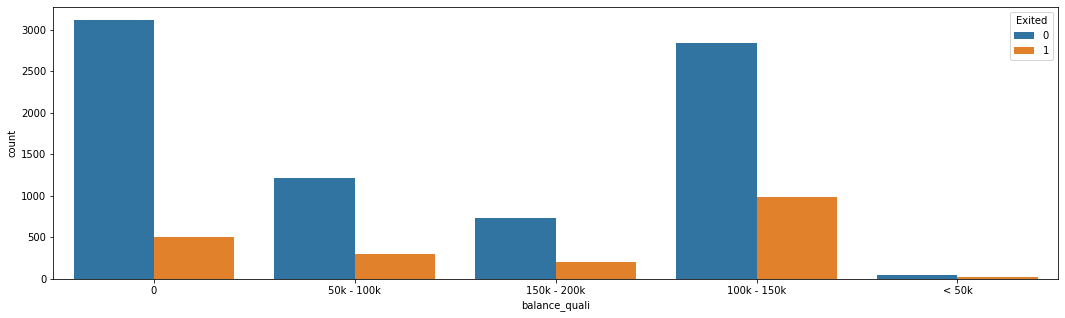

In [ ]:
salario_grafico = sns.countplot('balance_quali', data = df, hue = 'Exited')
salario_grafico.figure.set_size_inches(18, 5)
score_grafico.set_xlabel('Faixa Score', fontsize=16)
plt.show()

 - Após observar o histograma de frequencia do Balance dos que saíram foi percebido que:
    1. Havia uma grande quantidade de pessoas  sem saldo em conta
    2. Que dentre os que possui saldo a maioria está entre 150k - 200k

- Subdividi os dados em 5 partes para observar como os que deram churn foram subdividos:
    1.   Entre 100 e 150k : 987
    2.   0 : 500
    3.   50 - 100k: 300
    4.   150 - 200k : 205
    5.   1 - 50 : 26

- Podemos concluir  analisando isoladamente esta variável que os clientes com os valores em conta entre 100k e 150k e 0 são os mais propicios a deixar 






In [ ]:
# GEOGRAPHY

In [ ]:
alemaes_sairam = df.query('Geography == "Germany"  & Exited == 1')
alemaes_saida_idade = alemaes_sairam[['Age']]


In [ ]:
franceses_sairam = df.query('Geography == "France"  & Exited == 1')
franceses_saida_idade = franceses_sairam[['Age']]

In [ ]:
espanhois_sairam = df.query('Geography == "Spain"  & Exited == 1')
espanhois_saida_idade = espanhois_sairam[['Age']]

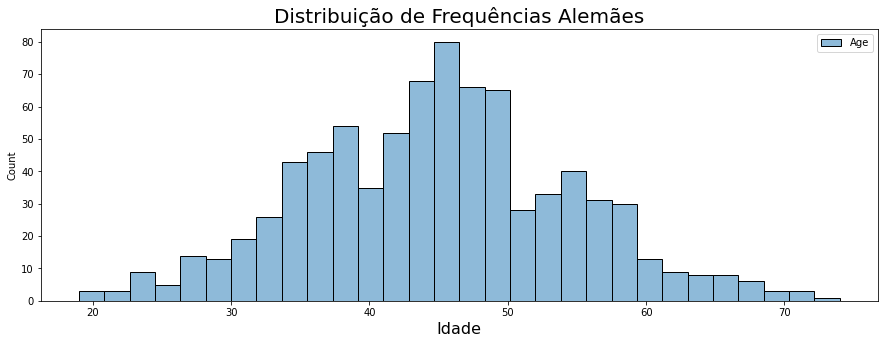

In [ ]:
hist_age = sns.histplot(alemaes_saida_idade, kde= False, bins = 30  )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências Alemães', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age

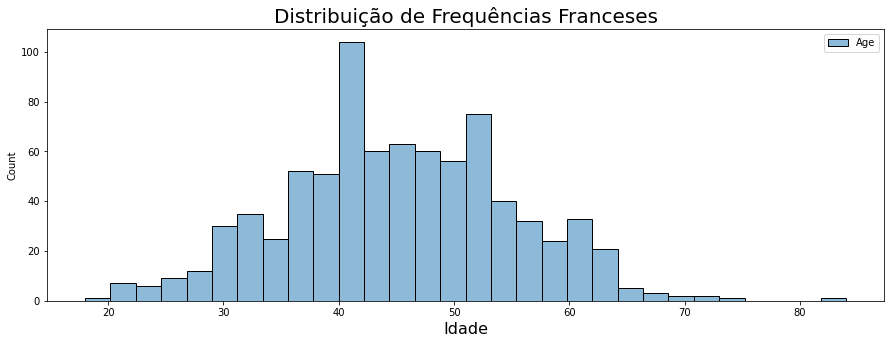

In [ ]:
hist_age = sns.histplot(franceses_saida_idade, kde= False, bins = 30  )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências Franceses', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age

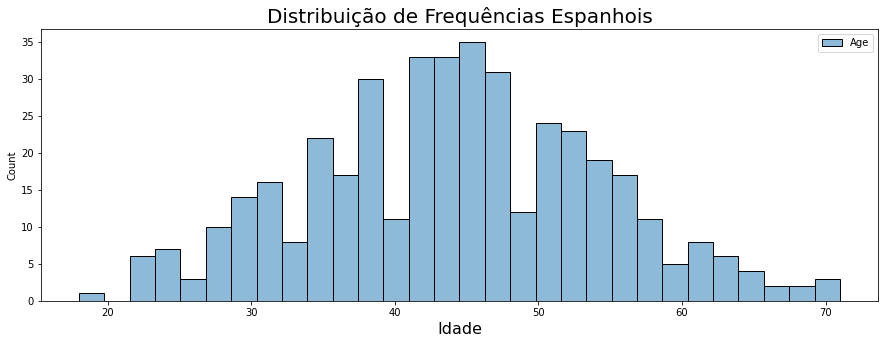

In [ ]:
hist_age = sns.histplot(espanhois_saida_idade, kde= False, bins = 30  )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências Espanhois', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age

GEOGRAPHY
- Por fim foi observado que em todos os paises estudados os usuários que saíram do banco possuem uma faixa etária parecida em seus níveis máximos
- Alemanha, França e Espanha estavam na faixa etária de 35-55 anos de idade
- Também foi possível observar que Espanha e Alemanha possui uma população mais velha.

#6.CONCLUSÃO:
A partir deste relatório foi possível observar padrões de saída dos clientes do banco. As variáveis quantitativas na presente análise são a mais relevantes para observação destes padrão.

Em nível complementar, a variável 'numero de produtos' poderia ser melhor exemplificada pelo time de negócios, a minha sugestão é que como só existem 4 produtos elas poderiam se categorizadas, por exemplo: Produto 1 = Pontos de milhas para viagem, Produto 2 = Seguro do cartão.  A partir disso poderíamos traçar quais desses produtos são mais importantes para o cliente. A minha outra sugestão é que a varíavel 'Tenure' poderia ser melhor trabalhada porque da forma que ela foi estruturada não nos dá nenhum indicativo de resposta, mas acredito que após uma adequação ela poderá ser avaliada com mais vigor.

Por fim para uma melhor conclusão de quais variáveis mais influenciam na saída dos clientes do banco é necessária uma análise estatísticas/machine learning mais aprofundadas.

